In [1]:
import sys
if not sys.argv[1] == "-f":
    path = sys.argv[1]
    mode = "commandline"
else:
    # 手動で解析する場合はデータのあるpathを指定してください
    path = "/home/amigos/hdd/observation/simple_ps/20190918_071755"
    mode = "notebook"

In [2]:
import necstdb
import numpy
import matplotlib.pyplot as plt
import os
import pandas

In [3]:
import sys
sys.path.append("/home/amigos/git/analy_n2data/script")

In [4]:
import make_dset
d, data = make_dset.get_data(path, "04")

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


100%|██████████| 3/3 [00:00<00:00, 1149.12it/s]

['1568791081.0505996', '1568791082.0039642', 'HOT', '0.0', '', '']
1 11
['1568791093.1046932', '1568791094.0571547', 'OFF', '0.0', '', '']
122 130
['1568791088.9874458', '1568791089.9439504', 'ON', '0.0', '0.0', '0.0']
83 91


In [5]:
d = numpy.array(d)
data = numpy.array(data)

In [6]:
xffts_data = data.T[2:].T

In [7]:
obs_mode = d.T[0]

In [8]:
hotmask = obs_mode == "HOT"
offmask = obs_mode == "OFF"
onmask = obs_mode == "ON"

In [9]:
hot = numpy.mean(xffts_data[hotmask], axis=0)
off = numpy.mean(xffts_data[offmask], axis=0)
on = numpy.mean(xffts_data[onmask], axis=0)

In [10]:
def chopper_wheel(on, off, hot, temprature = 300):
    Tastar = temprature * (on - off)/(hot - off)
    return Tastar

In [11]:
T = chopper_wheel(on, off, hot)

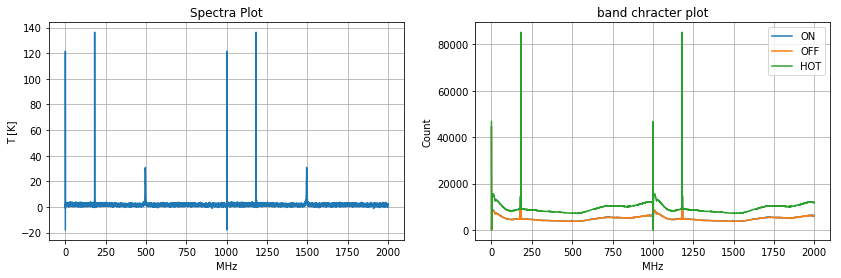

In [18]:
x = numpy.linspace(0, 2000, 32768)#XFFTS bw = 0-2000MHz
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(x, T)
#ax[0].set_xlim(xmin, xmax)
#ax[0].set_ylim(ymin, ymax)
ax[0].grid(True)
ax[0].set_xlabel("MHz")
ax[0].set_ylabel("T [K]")
ax[0].set_title("Spectra Plot")

ax[1].plot(x, on, label="ON")
ax[1].plot(x, off, label="OFF")
ax[1].plot(x, hot, label="HOT")
# ax[1].set_xlim(-1500, -1200)
# ax[1].set_ylim(3000,10000)
ax[1].set_xlabel("MHz")
ax[1].set_ylabel("Count")
ax[1].grid(True)
ax[1].legend()
#ax[1].set_yscale("log")
ax[1].set_title("band chracter plot")
plt.show()